In [1]:
import numpy as np
import sympy as sp
from sympy import Symbol
from sympy import solve, Poly, Eq, Function, exp
import math
import matplotlib.pyplot as plt
from numpy.lib.scimath import sqrt as csqrt
from scipy.signal import find_peaks
from scipy.constants import lambda2nu, nu2lambda, c
import os
import imp
import matplotlib.pyplot as plt
import sys
import pickle as plk
import pandas as pd
# Moises Path

#windows path
# os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\') 
# lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')

#linux path
sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi
sys.path.append(os.path.dirname('/home/moises/Downloads/'))
#

In [128]:
mode = lumapi.MODE(filename = './cml/Edge_Coupler.lms')

In [26]:
W = 140e-9
G = 400e-9
h = 220e-9
Wr = 0.75e-6
W_MMI = 1.6e-6
G_MMI = 0.08e-6
Wl = 0.45e-6
L = 40e-6
L_MMI = 5.1e-6
L_Taper = L - L_MMI
core = 'Si (Silicon) - Palik'

In [48]:
mode.switchtolayout()
mode.select('mmi_input_up')
mode.delete()
mode.select('mmi_input_down')
mode.delete()
mode.select('mmi_output')
mode.delete()
mode.select('MMI BOX')
mode.delete()
mode.select('output')
mode.delete()

mode.addobject('linear_taper')
mode.set({
    'name':'mmi_input_up',
    'x':L_Taper + 0.75e-6,
    'y':G_MMI/2 + 0.375e-6,
    'z':0,
    'width_l':Wl,
    'width_r':Wr,
    'angle_side':90,
    'len':1.5e-6,
    'thickness':h
})

mode.addobject('linear_taper')
mode.set({
    'name':'mmi_input_down',
    'x':L_Taper + 0.75e-6,
    'y':-G_MMI/2 - 0.375e-6,
    'z':0,
    'width_l':Wl,
    'width_r':Wr,
    'angle_side':90,
    'len':1.5e-6,
    'thickness':h
})

mode.addrect()
mode.set({
    'name':'MMI BOX',
    'x':L_Taper + 1.5e-6 + 1.05e-6,
    'x span':2.1e-6,
    'y':0,
    'y span':1.6e-6,
    'z':0,
    'z span':h,
    'material':core
})

mode.addobject('linear_taper')
mode.set({
    'name':'mmi_output',
    'x':L_Taper + 3.6e-6 + 0.75e-6,
    'y':0,i
mode.set({
    'name':'output',
    'x':L + 0.5e-6,
    'x span':1e-6,
    'y':0,
    'y span':0.45e-6,
    'z':0,
    'z span':h,
    'material':core
})



In [62]:
mode.run()

/tmp/ipykernel_2481/1926659448.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(x, y, 10*(np.log10(a[:,])), cmap = 'jet', vmin = -30, vmax = 0)


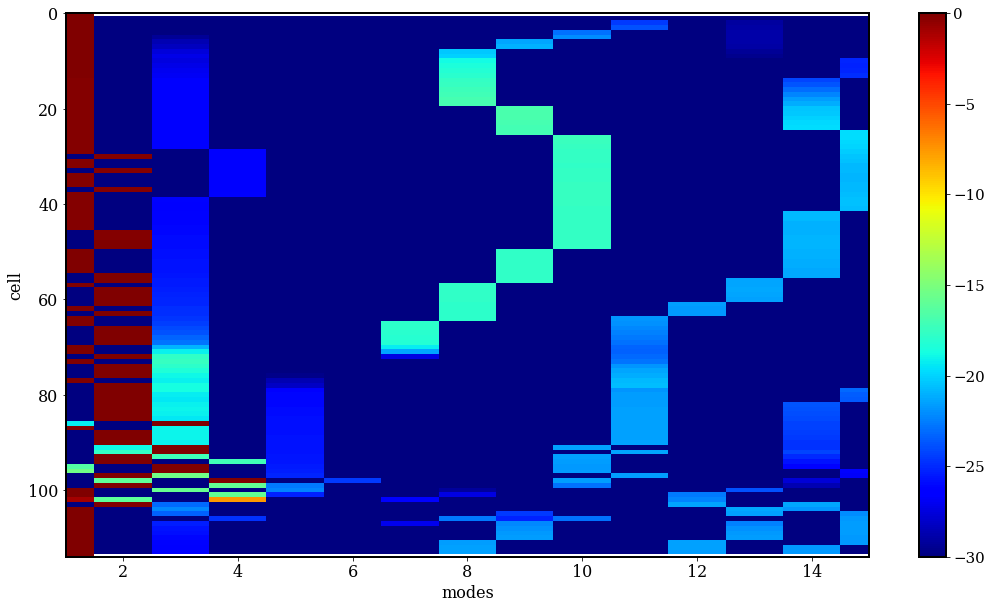

In [99]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
figure = plt.figure(figsize = (18, 10))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)

coeff = mode.getresult('EME','coefficients')
modes = coeff['mode']
cell = coeff['cell']
x = modes[:,0]
y = cell
a = abs(coeff['forward'])**2

plt.pcolormesh(x, y, 10*(np.log10(a[:,])), cmap = 'jet', vmin = -30, vmax = 0)
plt.axis([min(x), max(x), max(y), min(y)])
plt.xlabel('modes')
plt.ylabel('cell')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


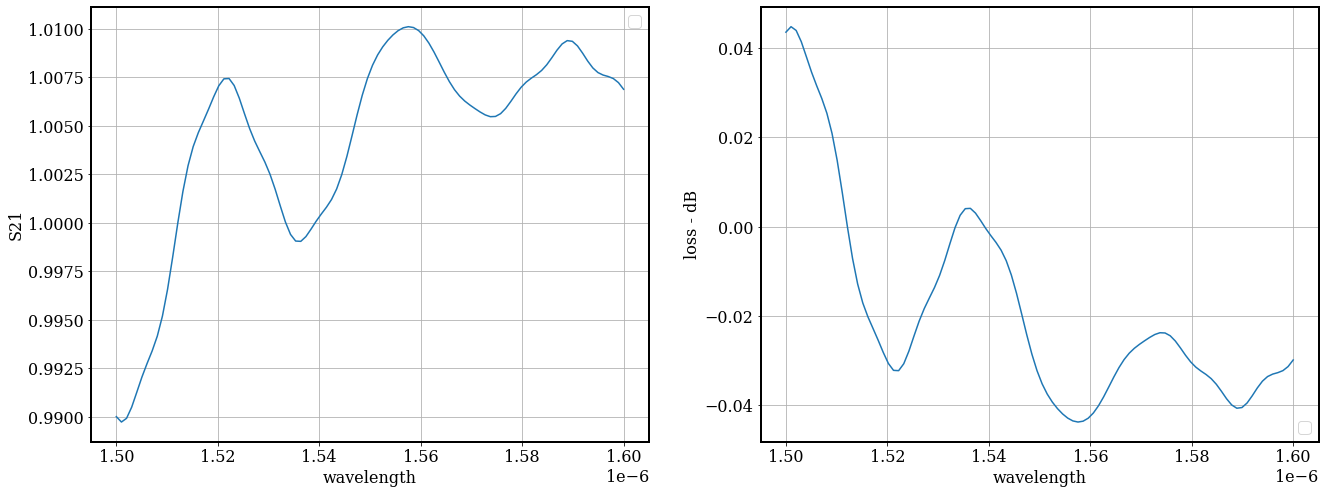

In [109]:
# mode.setemeanalysis("start wavelength",1500e-9)
# mode.setemeanalysis("stop wavelength",1600e-9)
# mode.emesweep('wavelength sweep')
S_parameters = mode.getemesweep("S_wavelength_sweep")
s21= abs(S_parameters['s21']**2)
wavelength = S_parameters['wavelength']

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

figure, ax = plt.subplots(1, 2, figsize=(22,8))

plt.rc('font', **font)
plt.rc('axes', linewidth=2)
ax[0].plot(wavelength, s21)
#plt.ylim([0.07, 0.09])
ax[0].set_xlabel("wavelength")
ax[0].set_ylabel("S21")
ax[0].grid(True)
ax[0].legend(loc = 'upper right')

ax[1].plot(wavelength, -10*np.log10(s21))
#plt.ylim([0.07, 0.09])
ax[1].set_xlabel("wavelength")
ax[1].set_ylabel("loss - dB")
ax[1].grid(True)
ax[1].legend(loc = 'lower right')
##end

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


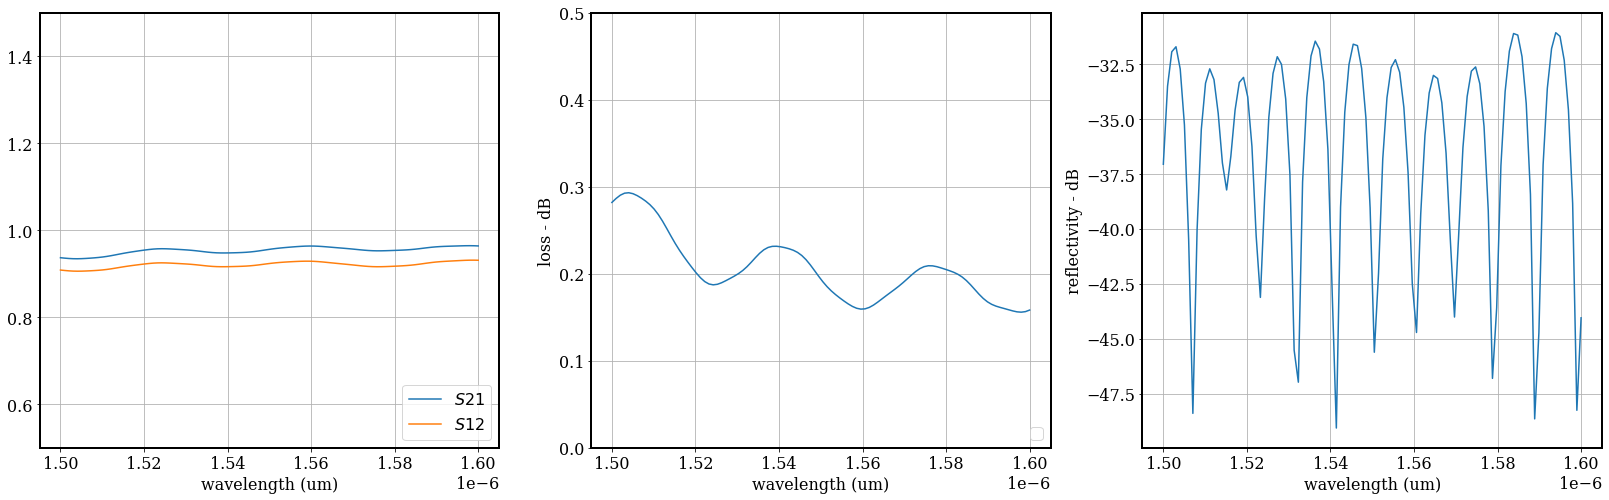

In [129]:
S_parameters = mode.getemesweep("S_wavelength_sweep")
s21= abs(S_parameters['s21']**2)
s12= abs(S_parameters['s12']**2)
s11= abs(S_parameters['s11']**2)
wavelength = S_parameters['wavelength']

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

figure, ax = plt.subplots(1, 3, figsize=(28,8))

plt.rc('font', **font)
plt.rc('axes', linewidth=2)
ax[0].plot(wavelength, s21, label = '$S21$')
ax[0].set_ylim([0.5, 1.5])
ax[0].set_xlabel("wavelength (um)")
#ax[0].set_ylabel("S21")
ax[0].grid(True)
ax[0].legend(loc = 'upper right')
#ax[0].set_ylim

ax[0].plot(wavelength, s12, label = '$S12$')
ax[0].legend(loc = 'lower right')

ax[1].plot(wavelength, -10*np.log10(s21))
#plt.ylim([0.07, 0.09])
ax[1].set_xlabel("wavelength (um)")
ax[1].set_ylabel("loss - dB")
ax[1].grid(True)
ax[1].legend(loc = 'lower right')
ax[1].set_ylim([0, 0.5])
##end

ax[2].plot(wavelength, 10*np.log10(s11), label = 'reflectivity')
ax[2].grid(True)
ax[2].set_xlabel('wavelength (um)')
ax[2].set_ylabel('reflectivity - dB')
plt.savefig('loss_300_300_nomesh_20_20')

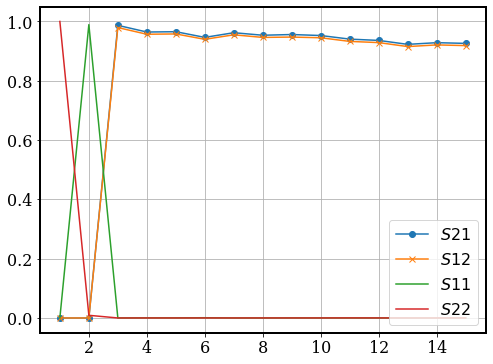

In [91]:
S_mode_sweep = mode.getemesweep("S_mode_convergence_sweep")
s21= abs(S_mode_sweep['s21']**2)
s12= abs(S_mode_sweep['s12']**2)
s11= abs(S_mode_sweep['s11']**2)
s22= abs(S_mode_sweep['s22']**2)

modes = S_mode_sweep['modes']

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

figure = plt.figure(figsize=(8,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(modes, s21, '-o', label = '$S21$')
plt.plot(modes, s12,'-x', label = '$S12$')
plt.plot(modes, s11, label = '$S11$')
plt.plot(modes, s22, label = '$S22$')
plt.grid(True)
plt.legend(loc = 'lower right')

plt.savefig('mode_convergence_sweep')

In [70]:
w_start = 100e-9
w_stop = 200e-9
number_of_points = 6
w = np.linspace(w_start, w_stop, number_of_points)
G = 400e-9
result = np.zeros(number_of_points)
for i in range(number_of_points):
    text = "Progress: " + str(i+1) + "/" + str(number_of_points)
    print(text)  

    mode.switchtolayout()
    mode.setnamed('taper_input_up','vertices', np.transpose([[0, G/2],[0, G/2 + w[i]],[34.9e-6, 0.64e-6],[34.9e-6, 0.16e-6]]))
    mode.setnamed('taper_input_down','vertices', np.transpose([[0, -G/2],[0, -(G/2 + w[i])],[34.9e-6, -0.64e-6],[34.9e-6, -0.16e-6]]))
    mode.run()
    mode.emepropagate()
    solution = mode.getresult('EME','user s matrix')
    result[i] = -10*np.log10((np.abs(solution[1,0])**2))

Progress: 1/6
Progress: 2/6
Progress: 3/6
Progress: 4/6


LumApiError: 'Operation on closed application'

In [138]:
xi = 24.9e-6
xf = 25.9e-6
nop = 10
x = np.linspace(xi, xf, nop)
neff = np.zeros(nop)

for i in range(nop):
    mode.switchtolayout()
    mode.setnamed('FDE','x', x[i])
    mode.findmodes()
    neff[i] = np.real(mode.getdata('FDE::data::mode1', 'neff'))

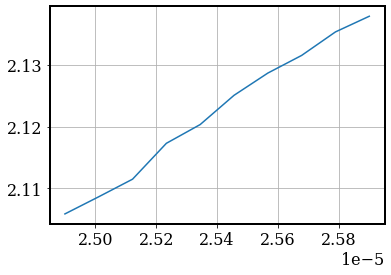

In [140]:
plt.plot(x, neff)
plt.grid(True)

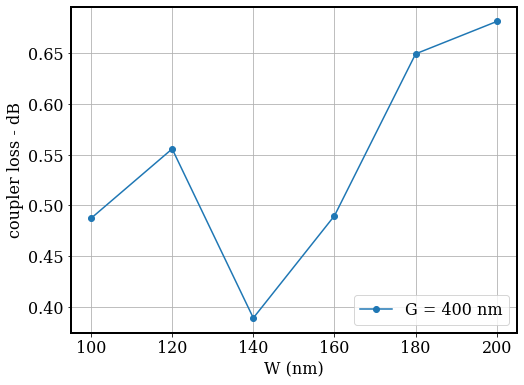

In [138]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

figure = plt.figure(figsize=(8,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(w*1e9,result,'-o', label = 'G = 400 nm')
plt.grid(True)
plt.xlabel('W (nm)')
plt.ylabel('coupler loss - dB')
plt.legend(loc = 'lower right') 
plt.savefig('first_sweep')

In [124]:
result

array([0.48713772, 0.55557474, 0.3890254 , 0.48973236, 0.64917466,
       0.6810601 ])

In [59]:
G = 400e-9
W = 140e-9
x = 34.9e-6
number_of_points = 6
w_start = 100e-9
w_stop = 200e-9
w = np.linspace(w_start,w_stop,number_of_points)

mode.addsweep()
mode.setsweep("sweep", "name", "G_400_sweep")
mode.setsweep("G_400_sweep", "type", "values")
mode.setsweep("G_400_sweep", "number of points", number_of_points)

para_1 = {"Name":"taper_input_up",
"Parameter":"::model::taper_input_up::vertices",
"Type":"Matrix"}


for k in range(number_of_points):
    matrix = np.array([[0, G/2],
                    [0, G/2 + w[k]],
                    [x, G_MMI/2 + 0.6e-6],
                    [x, G_MMI/2 + 0.15e-6]])
    para_1.update({"value_" + str(k+1):(matrix)})
mode.addsweepparameter('G_400_sweep', para_1)
print(para_1)

{'Name': 'taper_input_up', 'Parameter': '::model::taper_input_up::vertices', 'Type': 'Matrix', 'value_1': array([[0.00e+00, 2.00e-07],
       [0.00e+00, 3.00e-07],
       [3.49e-05, 6.40e-07],
       [3.49e-05, 1.90e-07]]), 'value_2': array([[0.00e+00, 2.00e-07],
       [0.00e+00, 3.20e-07],
       [3.49e-05, 6.40e-07],
       [3.49e-05, 1.90e-07]]), 'value_3': array([[0.00e+00, 2.00e-07],
       [0.00e+00, 3.40e-07],
       [3.49e-05, 6.40e-07],
       [3.49e-05, 1.90e-07]]), 'value_4': array([[0.00e+00, 2.00e-07],
       [0.00e+00, 3.60e-07],
       [3.49e-05, 6.40e-07],
       [3.49e-05, 1.90e-07]]), 'value_5': array([[0.00e+00, 2.00e-07],
       [0.00e+00, 3.80e-07],
       [3.49e-05, 6.40e-07],
       [3.49e-05, 1.90e-07]]), 'value_6': array([[0.00e+00, 2.00e-07],
       [0.00e+00, 4.00e-07],
       [3.49e-05, 6.40e-07],
       [3.49e-05, 1.90e-07]])}


In [95]:
eField1 = mode.getresult('monitor_3','field profile')

Text(0.5, 1.0, 'Field Profile')

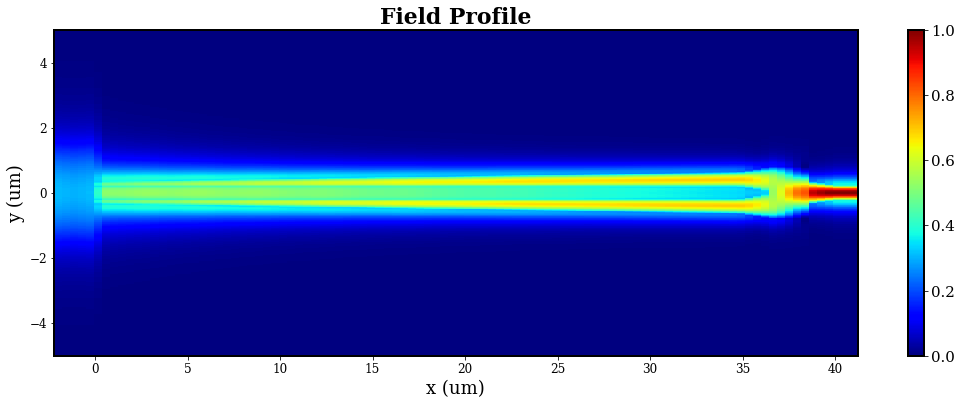

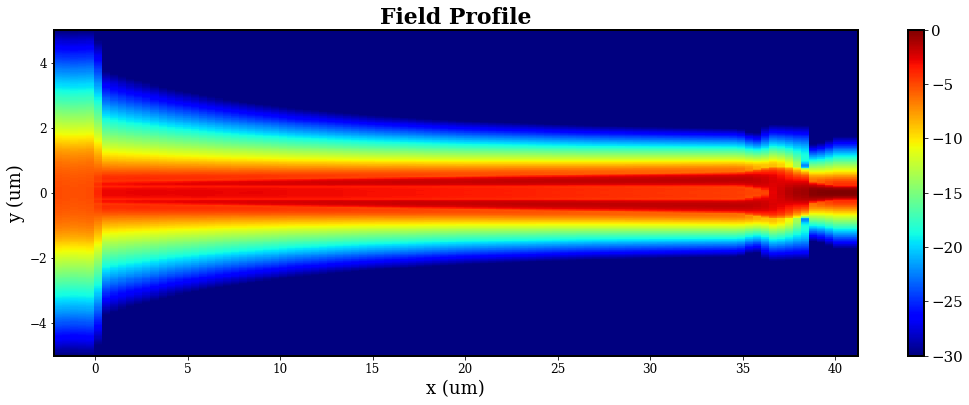

In [127]:
field = mode.getresult('monitor_3','field profile')
x = field['x']
y = field['y']
E = field['E']

E = np.sqrt(E[:,:,0,:,0]**2 + E[:,:,0,:,1]**2 + E[:,:,0,:,2]**2)
E = np.transpose(abs(E[:,:,0]))
np.shape(x[:,0])

plt.figure(figsize=(18, 6), edgecolor= 'white', facecolor= 'white')
plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E/np.max(E),cmap = 'jet', vmin = 0, vmax = 1)
plt.xlabel('x (um)',fontsize=18 )
plt.ylabel('y (um)',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
plt.title("Field Profile", fontsize = 22, fontweight='bold')
plt.savefig('Field Profile 20 x 20')

E = 10*np.log10(E/np.max(E))
plt.figure(figsize=(18, 6), edgecolor= 'white', facecolor= 'white')
plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet',vmin = -30)
plt.xlabel('x (um)',fontsize=18)
plt.ylabel('y (um)',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
plt.title("Field Profile", fontsize = 22, fontweight='bold')

In [62]:
E

array([[-27.68287298, -27.68099355, -27.68340073, ..., -20.29540547,
        -20.29410955, -20.31303681],
       [-27.7241849 , -27.7221104 , -27.72483029, ..., -20.36452508,
        -20.35211293, -20.36015712],
       [-27.76881231, -27.76652893, -27.76959758, ..., -20.4300444 ,
        -20.40693571, -20.40458396],
       ...,
       [-27.76881634, -27.76653297, -27.76960162, ..., -20.43004445,
        -20.40693575, -20.40458401],
       [-27.72418896, -27.72211446, -27.72483434, ..., -20.36452513,
        -20.35211298, -20.36015717],
       [-27.68287705, -27.68099762, -27.68340481, ..., -20.29540552,
        -20.29410959, -20.31303686]])

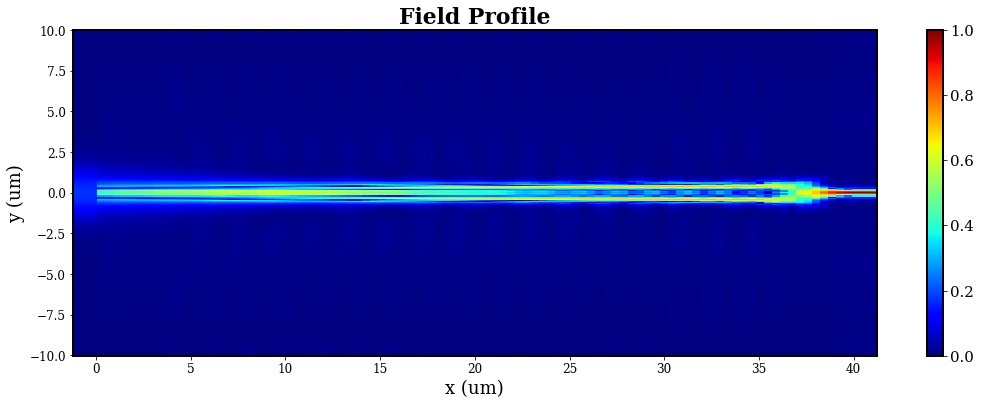

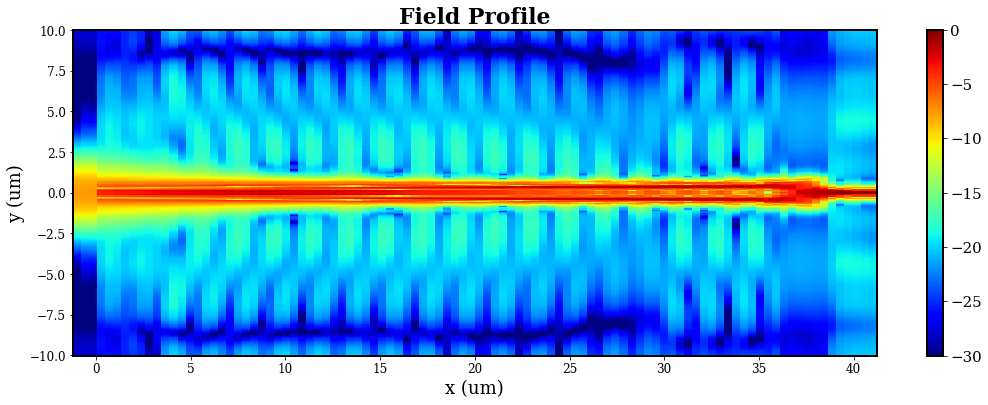

In [124]:
field = mode.getresult('monitor_3','field profile')
x = field['x']
y = field['y']
E = field['E']

E = np.sqrt(E[:,:,0,:,0]**2 + E[:,:,0,:,1]**2 + E[:,:,0,:,2]**2)
E = np.transpose(abs(E[:,:,0]))
np.shape(x[:,0])

plt.figure(figsize=(18, 6), edgecolor= 'white', facecolor= 'white')
plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E/np.max(E),cmap = 'jet', vmin = 0, vmax = 1)
plt.xlabel('x (um)',fontsize=18 )
plt.ylabel('y (um)',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
plt.title("Field Profile", fontsize = 22, fontweight='bold')
plt.savefig('Field Profile span 15')

E = 10*np.log10(E/np.max(E))
plt.figure(figsize=(18, 6), edgecolor= 'white', facecolor= 'white')
plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet',vmin = -30)
plt.xlabel('x (um)',fontsize=18)
plt.ylabel('y (um)',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
plt.title("Field Profile", fontsize = 22, fontweight='bold')
plt.savefig('Field Profile log span 15')

/tmp/ipykernel_2481/3582397137.py:21: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(y[:,0]*1e6,z[:,0]*1e6,10*np.log10(E),cmap = 'jet',vmin = -3)


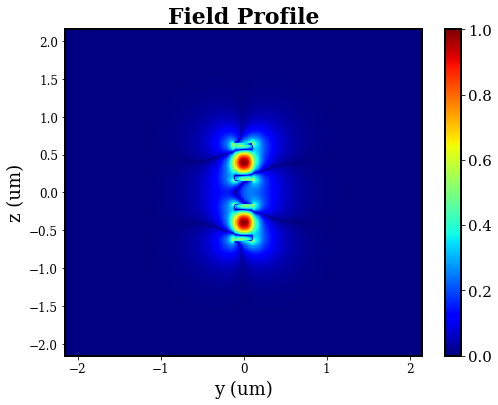

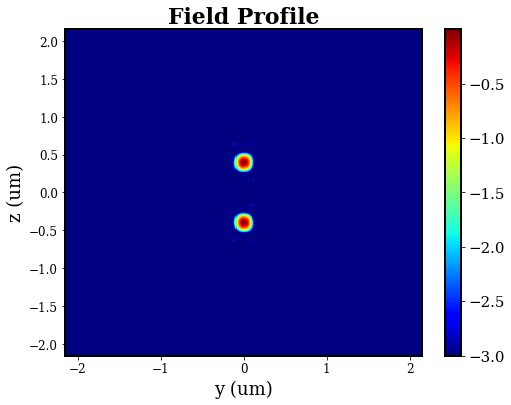

In [106]:
Ez = mode.getdata('FDE::data::mode2','Ez')
Ey = mode.getdata('FDE::data::mode2','Ey')
Ex = mode.getdata('FDE::data::mode2','Ex')
z = mode.getdata('FDE::data::mode2','z')
y = mode.getdata('FDE::data::mode2','y')
x = mode.getdata('FDE::data::mode2','x')
E = np.abs(np.sqrt(Ex[0,:,:,0]**2 + Ey[0,:,:,0]**2 + Ez[0,:,:,0]))

plt.figure(figsize=(8, 6), edgecolor= 'white', facecolor= 'white')
plt.pcolormesh(y[:,0]*1e6,z[:,0]*1e6,E,cmap = 'jet', vmin = 0, vmax = 1)
plt.xlabel('y (um)',fontsize=18 )
plt.ylabel('z (um)',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
plt.title("Field Profile", fontsize = 22, fontweight='bold')
plt.savefig('Field Profile span 15')

plt.figure(figsize=(8, 6), edgecolor= 'white', facecolor= 'white')
plt.pcolormesh(y[:,0]*1e6,z[:,0]*1e6,10*np.log10(E),cmap = 'jet',vmin = -3)
plt.xlabel('y (um)',fontsize=18)
plt.ylabel('z (um)',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
plt.title("Field Profile", fontsize = 22, fontweight='bold')
plt.savefig('Field Profile log span 15')

In [21]:
fdtd = lumapi.FDTD(filename = 'edge_coupler.fsp')

1.020615608976655e-05
0.12207803301167504


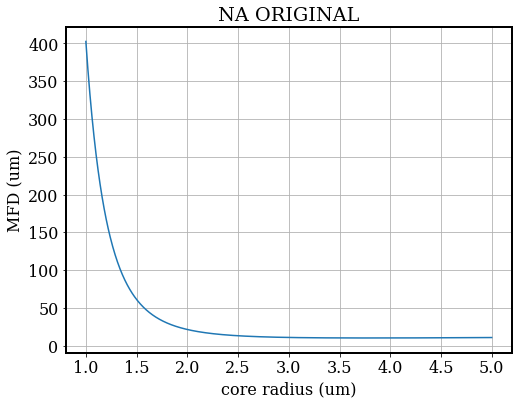

In [128]:
n1 = 1.44
n2 = 1.434816
NA_original = np.sqrt(n1**2 - n2**2)
lbd = 1550e-9

a = np.linspace(1e-6, 5e-6, 1000)
v = 2*np.pi*a*NA_original/lbd
MFD = 2*a*(0.65 + 1.619/v**1.5 + 2.879/v**6)

figure = plt.figure(figsize = (8,6))
plt.plot(a*1e6, MFD*1e6)
plt.grid(True)
plt.xlabel('core radius (um)')
plt.ylabel('MFD (um)')
#plt.xlim([3, 5])
#plt.ylim([10, 11])
plt.title('NA ORIGINAL')
print(np.min(MFD))
print(NA_original)

3.1148726638400107e-06
1.3833293172632466
1.3833293172632466


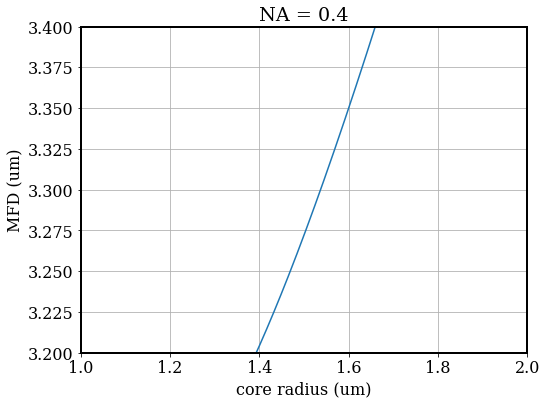

In [126]:
NA = 0.4
lbd = 1550e-9
n2 = np.sqrt(n1**2 - NA**2)

a = np.linspace(1e-6, 5e-6, 1000)
v = 2*np.pi*a*NA/lbd
MFD = 2*a*(0.65 + 1.619/v**1.5 + 2.879/v**6)

figure = plt.figure(figsize = (8,6))
plt.plot(a*1e6, MFD*1e6)
plt.grid(True)
plt.xlabel('core radius (um)')
plt.ylabel('MFD (um)')
plt.xlim([1, 2])
plt.ylim([3.2, 3.4])
plt.title('NA = 0.4')
print(np.min(MFD))
print(n2) ## new cladding refractive index
print(n2)

Text(0, 0.5, 'coupler loss - dB')

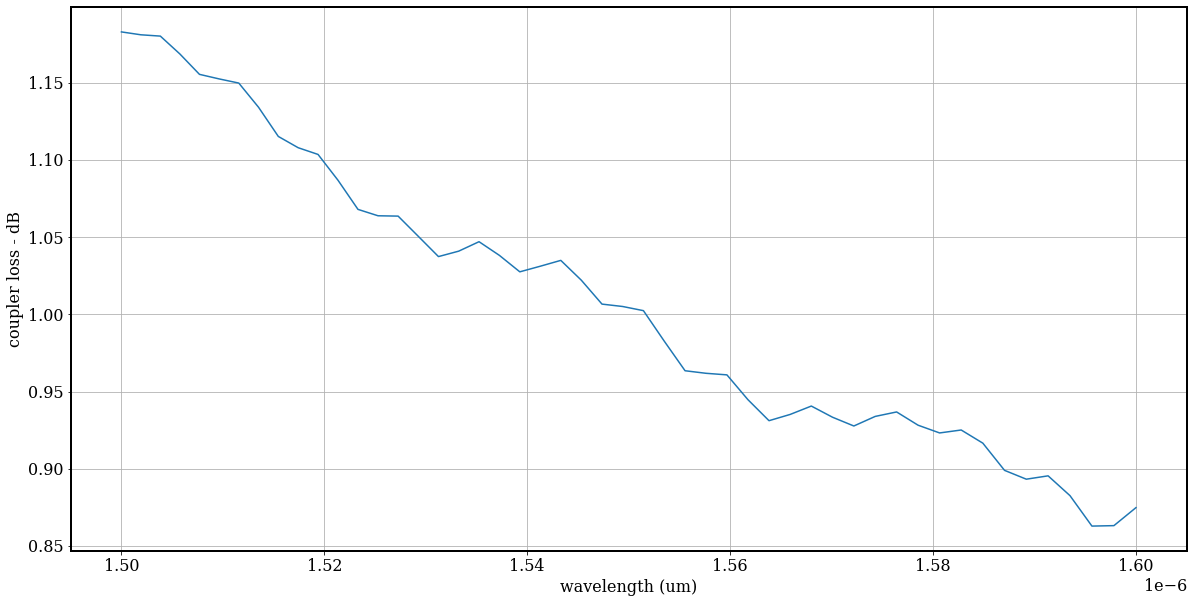

In [170]:
Result_T2 = fdtd.getresult('FDTD::ports::port 2','T')
wavelength = Result_T2['lambda']
T2 = (Result_T2['T'])
loss = -10*np.log10(T2)



font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
figure = plt.figure(figsize = (20,10))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(wavelength, loss)
plt.grid(True)
plt.xlabel('wavelength (um)')
plt.ylabel('coupler loss - dB')

In [165]:
eField = np.squeeze(fdtd.getelectric("monitor"))

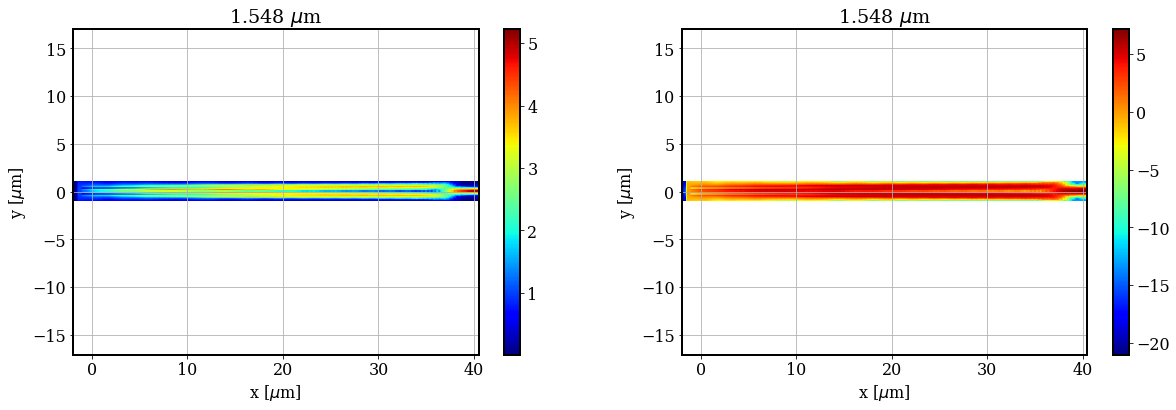

In [166]:
indxLambda = 12
x_efielf = fdtd.getdata("monitor", "x")
y_efielf = fdtd.getdata("monitor", "y")
lmbd = nu2lambda(fdtd.getdata("monitor", "f"))
xmin = 1e6*np.min(x_efielf)
xmax = 1e6*np.max(x_efielf)
ymin = 1e6*np.min(y_efielf)
ymax = 1e6*np.max(y_efielf)

fig1, axs1 = plt.subplots(1,2,figsize=(20,6))
im1 = axs1[0].imshow(np.rot90(np.sqrt(eField[:,:,indxLambda])), cmap = 'jet', extent=[xmin, xmax, ymin, ymax])
fig1.colorbar(im1, ax=axs1[0])
axs1[0].set_xlabel(r'x [$\mu$m]')
axs1[0].set_ylabel(r'y [$\mu$m]')
axs1[0].set_title(r'%4.3f $\mu$m'%(1e6*lmbd[indxLambda]))
axs1[0].grid(True)
axs1[0].axis('equal')

im2 = axs1[1].imshow(10*np.log10(np.rot90(np.sqrt(eField[:,:,indxLambda]))), cmap = 'jet', extent=[xmin, xmax, ymin, ymax])
fig1.colorbar(im2, ax=axs1[1])
axs1[1].set_xlabel(r'x [$\mu$m]')
axs1[1].set_ylabel(r'y [$\mu$m]')
axs1[1].set_title(r'%4.3f $\mu$m'%(1e6*lmbd[indxLambda]))
axs1[1].grid(True)
axs1[1].axis('equal')

fig1.tight_layout
plt.rcParams.update({'font.size': 16})



In [20]:
mode.getattribute('EME::ports::port_1')

LumApiError: 'getattribute method applied to a variable that is not a dataset'